<a id='Introduction'></a>
<h2 style="text-align:center;font-family:verdana;"><b>Mental Health in Tech - Analysis</b></h2>
<hr>
<p style="font-family:verdana;font-size:20px"> As a fresher nearing 1 year of full-time experience, I am genuinely curious to understand the mental health status of more experienced professionals and how much backing they receive from their organizations to open up and express themselves. Additionally, I wanted to explore on the various factors that could impact how people feel. I hope to uncover something cool. Let's go!!
</p>

In [28]:
import numpy as np 
import pandas as pd
import plotly 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-in-tech-survey/survey.csv


In [29]:
init_notebook_mode(connected=True)
cf.go_offline(True)

In [30]:
survey_df = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")

In [31]:
survey_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [32]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [33]:
survey_df.shape

(1259, 27)

<a id='Preprocessing - Missing values'></a>
<h2> Checking for missing values </h2>

In [34]:
missing_features = ((survey_df.isnull().sum().sort_values(ascending=False)>0)==True).tolist()
missing_features_true = [col for col in missing_features if col==True]

In [35]:
features = survey_df.isnull().sum().sort_values(ascending=False).head(len(missing_features_true)).index
missing_data = survey_df.isnull().sum().sort_values(ascending=False).head(len(missing_features_true)).values

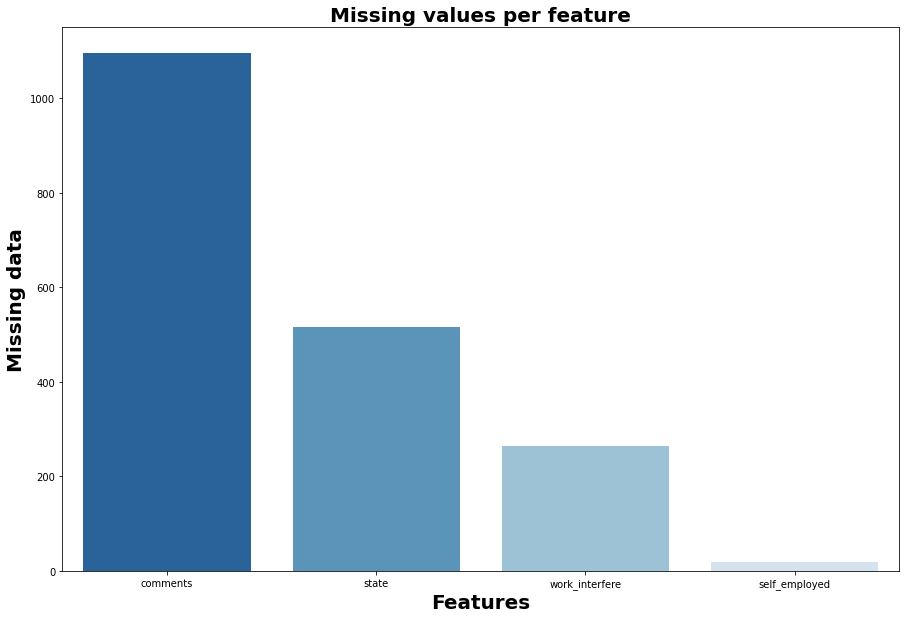

In [36]:
plt.figure(figsize=(15,10))
plt.xlabel("Features",fontweight='bold',fontsize=20.0)
plt.ylabel("Missing data",fontweight='bold',fontsize=20.0)
sns.barplot(x=features,y=missing_data,palette='Blues_r')
plt.title("Missing values per feature",fontweight='bold',fontsize=20.0)
plt.show()

<p style="font-family:verdana;font-size:16px"><b>📌: Starting off with the "state" feature, it was mentioned in the description that it is null for non-US countries. Therefore, it makes sense to fill the missing values with 'Not in US'</b></p>

In [37]:
survey_df.state = survey_df.state.fillna('Not in US')

I found the state list from this link: https://gist.github.com/rogerallen/1583593

In [38]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [39]:
survey_df['State_Name'] = survey_df.state.apply(lambda state_code: abbrev_to_us_state[state_code] if state_code not in 'Not in US' else 'Not Applicable')

In [40]:
usa_data = survey_df[survey_df.Country=='United States']
locations = usa_data.state.value_counts().keys()
state_count = usa_data.state.value_counts().values
state_name = usa_data.State_Name.value_counts().keys()

In [41]:
data = dict(type='choropleth',locations = locations,locationmode='USA-states',z=state_count,colorscale='rainbow',text = state_name) 
usa_layout = dict(title='<b>Recorded responses from employees in the US</b>',geo=dict(scope='usa'),title_x=0.5)

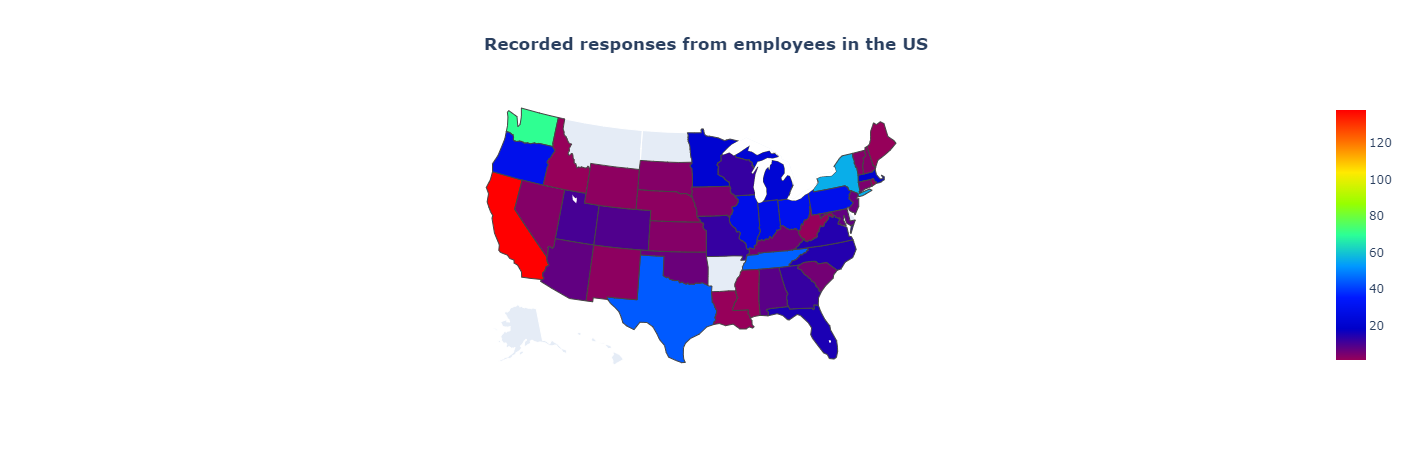

In [42]:
usa_data_fig = go.Figure(data=[data],layout=usa_layout)
usa_data_fig.show()

In [43]:
non_usa_data = pd.concat([survey_df,usa_data,usa_data]).drop_duplicates(keep=False)
locations_non_usa = non_usa_data.Country.value_counts().keys()
countries_count = non_usa_data.Country.value_counts().values

In [44]:
data_non_usa = dict(type='choropleth',locations = locations_non_usa,locationmode='country names',z=countries_count,colorscale='rainbow') 
layout_non_usa = dict(title='<b>Recorded responses from other employees across the globe</b>',title_x=0.5,geo=dict(scope='world'),height=1000,width=1000)

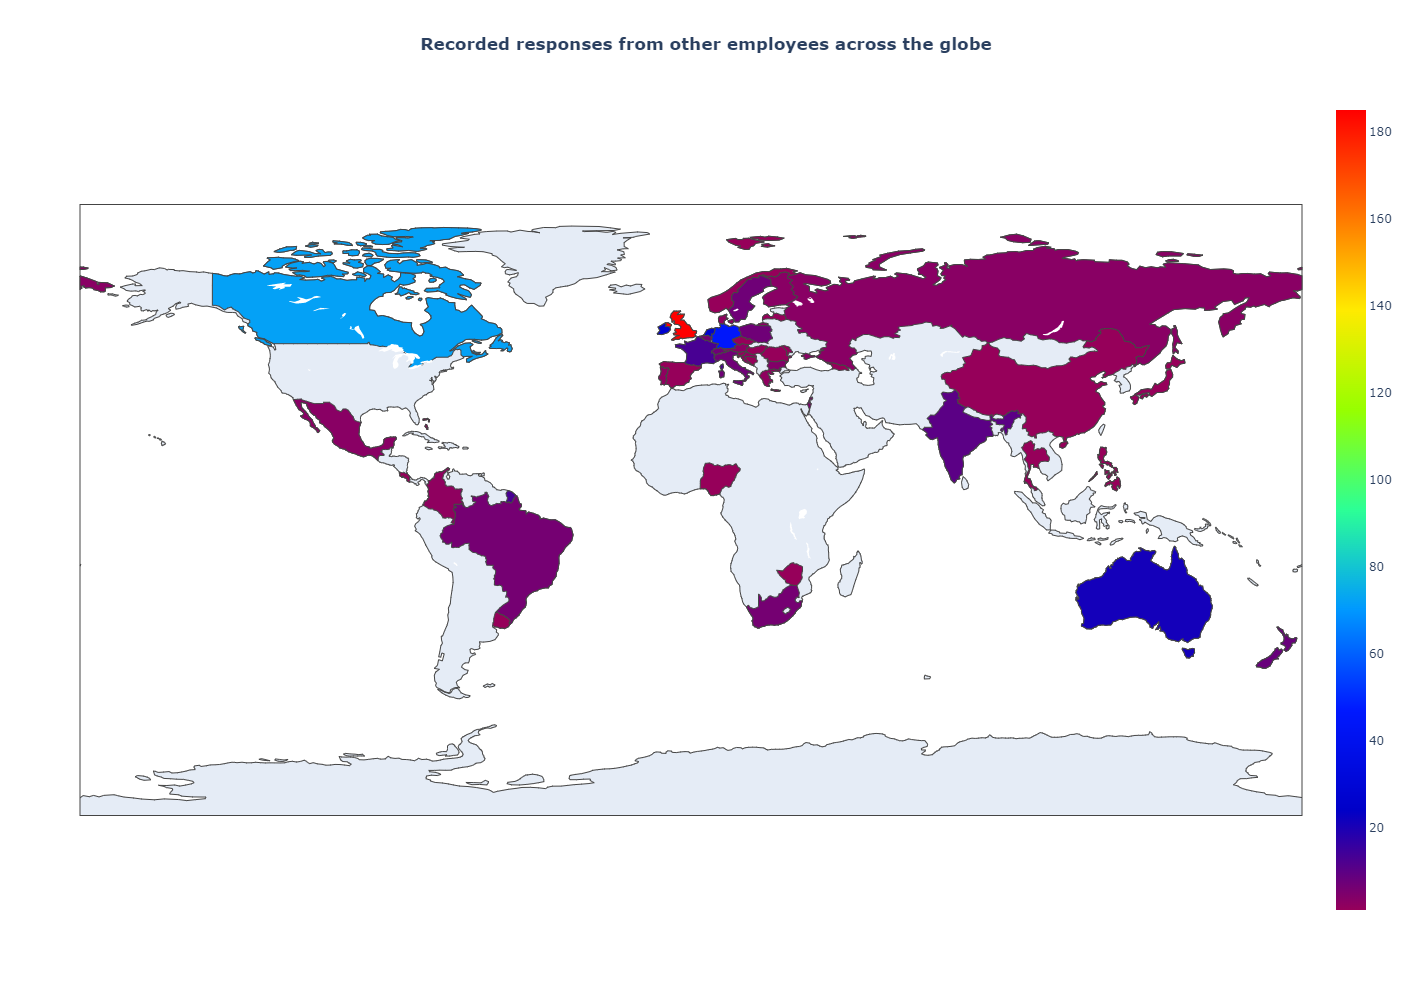

In [45]:
non_usa_data_fig = go.Figure(data=[data_non_usa],layout=layout_non_usa)
non_usa_data_fig.show()

<p style="font-family:verdana;font-size:16px"><b>📌: Proceeding to the "comments" feature. It would be interesting to plot a word cloud on the responses received.</b></p>

In [46]:
comments_non_null = survey_df[survey_df.comments.isna()==False]

In [47]:
comments_received = comments_non_null.comments
comments_received = " ".join(comments_received.to_string().split())

(-0.5, 1399.5, 1399.5, -0.5)

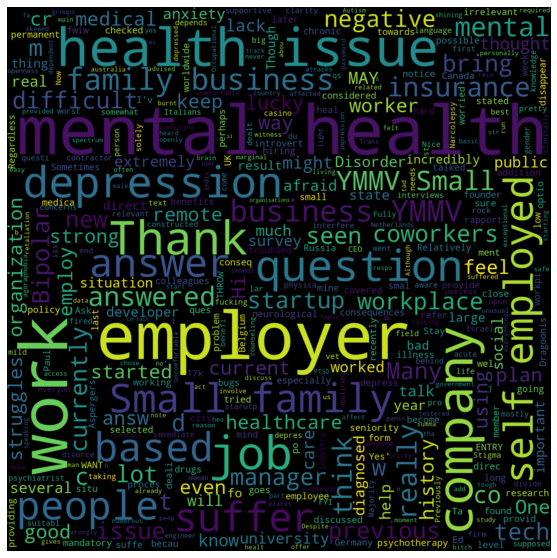

In [48]:
comments_wordcloud = WordCloud(width=1400,height=1400,max_words=1000,stopwords=STOPWORDS,background_color='black').generate(comments_received)
plt.figure(figsize=(15,10))
plt.imshow(comments_wordcloud,interpolation='bilinear')
plt.axis('off')

<p style="font-family:verdana;font-size:16px"><b>📌: For the remaining features, "work_interfere" and "self_employed", the missing data will be replaced with 'Not Available'</b></p>

In [49]:
survey_df.work_interfere = survey_df.work_interfere.fillna('Not Available')

In [50]:
survey_df.self_employed = survey_df.self_employed.fillna('Not Available')

<a id='Preprocessing - Categorical features'></a>
<h2> Inspecting the categorical features</h2>

In [51]:
categorical_features = survey_df.select_dtypes('object')

In [52]:
useful_categorical_features = [col for col in categorical_features.columns if col not in ('Timestamp','Country','state','State_Name','comments')]

In [53]:
categorical_data = categorical_features.loc[:,useful_categorical_features]

In [54]:
categorical_data.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,Female,Not Available,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,M,Not Available,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,Male,Not Available,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,Male,Not Available,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,Male,Not Available,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<p style="font-family:verdana;font-size:16px"><b>📌: The 22 features available can be stratified into three main categories:<br>
    <li style="font-family:verdana;font-size:16px"> Nominal Features: </li><br>
    <li style="font-family:verdana;font-size:16px"> Ordinal Features: </li><br>
    <li style="font-family:verdana;font-size:16px"> Binary Features: </li><br></b>
</p>

In [58]:
categorical_data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      